In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
TMT_A1=pd.read_excel('/content/TMT_A1.xlsx')
TMT_A2=pd.read_excel('/content/TMT_A2.xlsx')
TMT_B1=pd.read_excel('/content/TMT_B1.xlsx')
TMT_B2=pd.read_excel('/content/TMT_B2.xlsx')

In [2]:
TMT_A1["label"] = "None" *len(TMT_A1["mmse_score"])
for i in range(len(TMT_A1["mmse_score"])):
  if 20 < TMT_A1["mmse_score"][i] <= 25:
    TMT_A1["label"][i] = 0
  else:
    TMT_A1["label"][i] = 1

<ipython-input-2-3522b59775f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_A1["label"][i] = 1
<ipython-input-2-3522b59775f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_A1["label"][i] = 0


In [3]:
TMT_A2["label"] = "None" *len(TMT_A2["mmse_score"])
for i in range(len(TMT_A2["mmse_score"])):
  if 20 < TMT_A2["mmse_score"][i] <= 25:
    TMT_A2["label"][i] = 0
  else:
    TMT_A2["label"][i] = 1

<ipython-input-3-759457334ff0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_A2["label"][i] = 1
<ipython-input-3-759457334ff0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_A2["label"][i] = 0


In [4]:
TMT_B1["label"] = "None" *len(TMT_B1["mmse_score"])
for i in range(len(TMT_B1["mmse_score"])):
  if 20 < TMT_B1["mmse_score"][i] <= 25:
    TMT_B1["label"][i] = 0
  else:
    TMT_B1["label"][i] = 1

<ipython-input-4-eeacfb53ad22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_B1["label"][i] = 1
<ipython-input-4-eeacfb53ad22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_B1["label"][i] = 0


In [5]:
TMT_B2["label"] = "None" *len(TMT_B2["mmse_score"])
for i in range(len(TMT_B2["mmse_score"])):
  if 20 < TMT_B2["mmse_score"][i] <= 25:
    TMT_B2["label"][i] = 0
  else:
    TMT_B2["label"][i] = 1

<ipython-input-5-2685face48ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_B2["label"][i] = 1
<ipython-input-5-2685face48ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMT_B2["label"][i] = 0


In [6]:
#TMT_A1=pd.concat([TMT_A1,TMT_A2,TMT_B1,TMT_B2])
TMT_A1.replace(np.nan,0)

,average_left_saccade_duration,average_right_saccade_duration,average_right_pupil_diameter,average_left_pupil_diameter,average_left_fixation_duration,average_right_fixation_duration,fixation_time,saccade_count,fixation_count,mmse_score,label
0,84.660554,83.175250,3.271862,3.237874,1291.988889,1634.987714,11.910695,56,9,15,1
1,86.051977,80.702466,3.464801,3.210727,1710.083000,1816.785071,14.206332,77,6,10,1
2,78.996763,77.267449,2.452377,2.384576,2112.651158,2499.416188,14.605573,78,4,25,0
3,84.335826,88.244288,1.790905,4.016019,1706.874750,2161.764286,7.934918,47,9,16,1
4,83.391980,85.967550,5.401086,5.245580,1659.472091,2014.120577,7.119801,49,5,14,1
...,...,...,...,...,...,...,...,...,...,...,...
95,124.016257,127.208489,3.220308,3.733450,687.245392,655.208570,7.003355,46,8,17,1
96,123.633970,126.867737,4.549241,4.119333,690.893710,657.140733,7.086531,42,4,16,1
97,124.479338,127.754968,3.698704,3.858378,688.956524,653.673357,14.505763,60,21,13,1
98,124.436090,127.700067,4.622283,4.031383,689.949835,654.484362,11.278563,60,14,19,1


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

X = TMT_A1.drop(['label','mmse_score'],axis=1)
y = TMT_A1[["label"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
print(X_train.shape)
y_test

(64, 9)


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [8]:
from keras.optimizers import SGD
input_layer = Input(shape=(X_train.shape[1],))
model = Sequential()
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu', input_dim=input_layer))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/300
2/2 [==============================] - 2s 387ms/step - loss: 72.6906 - accuracy: 0.5938 - val_loss: 36.4761 - val_accuracy: 0.8750
Epoch 2/300
2/2 [==============================] - 0s 36ms/step - loss: 64.8225 - accuracy: 0.5625 - val_loss: 22.4239 - val_accuracy: 0.8750
Epoch 3/300
2/2 [==============================] - 0s 50ms/step - loss: 61.8424 - accuracy: 0.4844 - val_loss: 9.3700 - val_accuracy: 0.8750
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 53.8688 - accuracy: 0.5312 - val_loss: 12.2067 - val_accuracy: 0.2500
Epoch 5/300
2/2 [==============================] - 0s 33ms/step - loss: 39.1769 - accuracy: 0.5625 - val_loss: 20.8408 - val_accuracy: 0.1250
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 63.1568 - accuracy: 0.4375 - val_loss: 32.6731 - val_accuracy: 0.1250
Epoch 7/300
2/2 [==============================] - 0s 33ms/step - loss: 61.5770 - accuracy: 0.4688 - val_loss: 24.3124 - val_accuracy: 0.1250
Epoch 

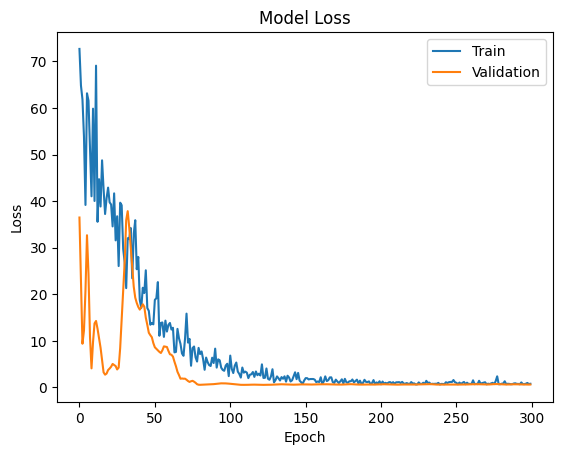

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 [==============================] - 0s 146ms/step - loss: 0.7184 - accuracy: 0.3500
Test Loss: 0.7184251546859741
Test Accuracy: 0.3499999940395355


In [11]:
X_train.shape[1]

9

In [12]:
import keras,os
from keras.datasets import fashion_mnist,cifar100 
from keras.layers import Dense,Activation,Flatten,Conv1D,MaxPooling1D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import cv2
from keras import optimizers 
from keras.layers.core import Lambda 
from keras import backend as K
from keras import regularizers 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(9,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=300, batch_size=32,validation_data=(X_val, y_val))

Epoch 1/300
2/2 [==============================] - 1s 189ms/step - loss: 0.6191 - accuracy: 0.4375 - val_loss: 0.9299 - val_accuracy: 0.1250
Epoch 2/300
2/2 [==============================] - 0s 33ms/step - loss: 0.6168 - accuracy: 0.4375 - val_loss: 0.9277 - val_accuracy: 0.1250
Epoch 3/300
2/2 [==============================] - 0s 32ms/step - loss: 0.6146 - accuracy: 0.4375 - val_loss: 0.9255 - val_accuracy: 0.1250
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 0.6124 - accuracy: 0.4375 - val_loss: 0.9233 - val_accuracy: 0.1250
Epoch 5/300
2/2 [==============================] - 0s 34ms/step - loss: 0.6103 - accuracy: 0.4375 - val_loss: 0.9213 - val_accuracy: 0.1250
Epoch 6/300
2/2 [==============================] - 0s 35ms/step - loss: 0.6083 - accuracy: 0.4375 - val_loss: 0.9193 - val_accuracy: 0.1250
Epoch 7/300
2/2 [==============================] - 0s 43ms/step - loss: 0.6063 - accuracy: 0.4375 - val_loss: 0.9174 - val_accuracy: 0.1250
Epoch 8/300
2/2 [==

In [13]:
X_train.shape

(64, 9)

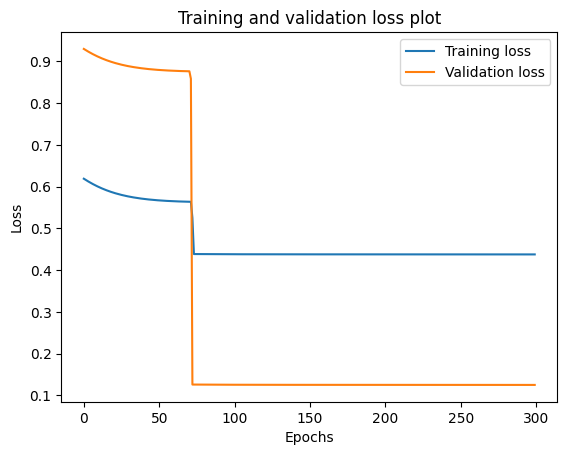

In [14]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

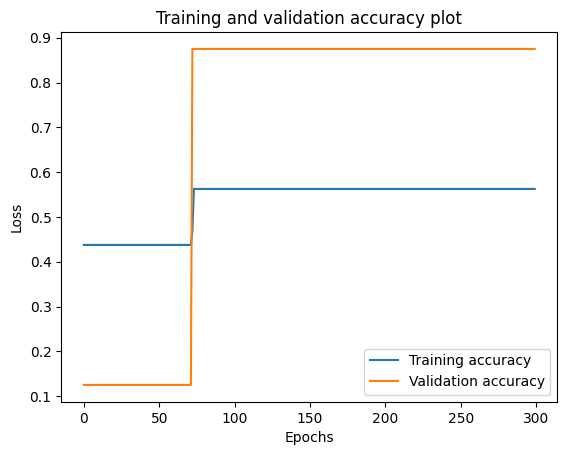

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
loss, accuracy = model1.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 [==============================] - 0s 143ms/step - loss: 0.6503 - accuracy: 0.3500
Test Loss: 0.6503216624259949
Test Accuracy: 0.3499999940395355


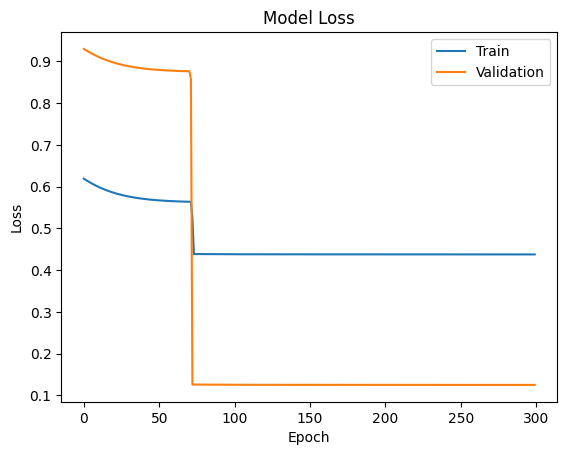

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


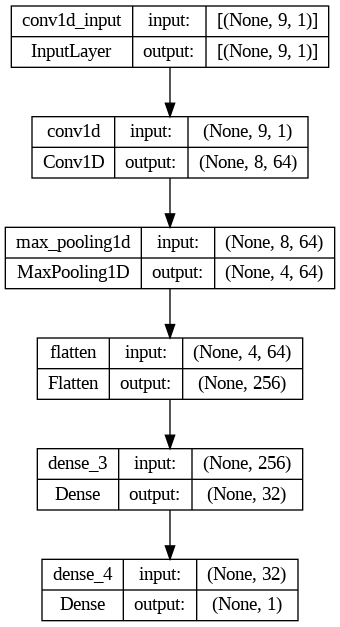

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from graphviz import Source
# Generate a diagram of the model architecture
plot_model(model1,show_shapes=True)



In [19]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install ada-boost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(9,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])
# Extract feature vectors
feature_extractor = tf.keras.Model(inputs=model2.input, outputs=model2.layers[3].output)
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)
# Define classifiers
classifiers = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}
# Train and evaluate classifiers
for clf_name, clf in classifiers.items():
    clf.fit(train_features, y_train)
    y_pred = clf.predict(test_features)
    acc = accuracy_score(y_test, y_pred)
    print(f'{clf_name} accuracy: {acc}')
print("-------------------------------------")
# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'LASSO': Lasso(),
    'kNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'ADA Boosted Trees': AdaBoostRegressor(),
    'Gradient Boosted Trees': GradientBoostingRegressor(),
    'XG Boosting Trees': XGBRegressor()
}
# Train and evaluate regressors
for reg_name, reg in regressors.items():
    reg.fit(train_features, y_train)
    y_pred = reg.predict(test_features)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{reg_name} MSE: {mse}')

1/1 [==============================] - 0s 69ms/step
kNN accuracy: 0.5
Decision Tree accuracy: 0.45
Random Forest accuracy: 0.5
SVM accuracy: 0.35
Naive Bayes accuracy: 0.75
-------------------------------------
Linear Regression MSE: 9.822519302368164
LASSO MSE: 0.2508229613304138
kNN MSE: 0.27399998903274536
Decision Tree MSE: 0.6
Random Forest MSE: 0.31960500000000003
ADA Boosted Trees MSE: 0.3597315154792862
Gradient Boosted Trees MSE: 0.40157547860473786
XG Boosting Trees MSE: 0.42299383878707886


In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 7, 64)             256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                6176      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
____________________________________________________

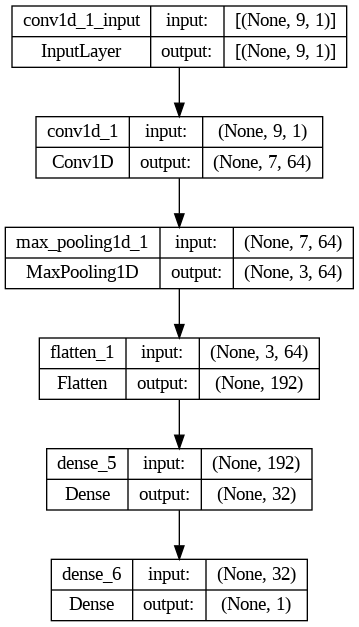

In [24]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from graphviz import Source
# Generate a diagram of the model architecture
plot_model(model2,show_shapes=True)

In [25]:
import numpy as np

def data_augmentation_1d(data, noise_scale=0.05, shift_range=0.1):
    """
    Perform data augmentation on 1D data.
    
    Args:
        data (numpy.ndarray): 1D numpy array of shape (n,)
        noise_scale (float): scaling factor for noise level (default: 0.05)
        shift_range (float): maximum shift percentage (default: 0.1)
        
    Returns:
        numpy.ndarray: augmented data of shape (n, m), where m = 3
    """
    
    # Add Gaussian noise to the data
    noise = np.random.normal(scale=noise_scale, size=data.shape)
    augmented_data = np.vstack((data, data + noise, data - noise))
    
    # Shift the data randomly
    shift = np.random.uniform(low=-shift_range, high=shift_range, size=data.shape)
    augmented_data = np.vstack((augmented_data, data + shift, data - shift))
    
    return augmented_data.T
all_data=data_augmentation_1d(X_train)
all_output=data_augmentation_1d(y_train)

In [26]:
model=Sequential()
model.add(Conv1D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(9,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2))
# 1st dropout
model.add(Dropout(0.2))
model.add(Flatten())
#l2 regularizer
model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
# 2nd dropout
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 16)             48        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 32)             1056      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)           

In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def data_augmentation_1d(data, n_augmentations=10, noise_factor=0.05):
    """
    Generate augmented data by randomly adding noise to the input data.

    Args:
        data (ndarray): 1D array of the input data.
        n_augmentations (int): Number of augmented samples to generate.
        noise_factor (float): The scale of the added noise as a fraction of the data range.

    Returns:
        augmented_data (ndarray): 2D array of the augmented data, where the first dimension
            corresponds to the number of augmented samples and the second dimension corresponds
            to the length of the input data.
    """
    data_range = np.max(data) - np.min(data)
    augmented_data = np.zeros((n_augmentations, len(data)))
    for i in range(n_augmentations):
        noise = np.random.randn(len(data)) * data_range * noise_factor
        augmented_data[i, :] = data + noise
    return augmented_data


# Generate augmented data
augmented_data = np.zeros((640, 9))
augmented_output = np.zeros((640, 1))
for i in range(64):
    X_sample = X_train[i, :]
    y_sample = y_train[i, :]
    X_augmented = data_augmentation_1d(X_sample, n_augmentations=10, noise_factor=0.05)
    y_augmented = y_sample.repeat(10).reshape(-1, 1)  # reshape to (10, 1)
    augmented_data[i*10:(i+1)*10, :] = X_augmented
    augmented_output[i*10:(i+1)*10, :] = y_augmented

# Combine the original and augmented data
all_data = np.vstack((X_train, augmented_data))
all_output = np.vstack((y_train, augmented_output))

# Define a simple model4
model4=Sequential()
model4.add(Conv1D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(9,1)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32,kernel_size=2,padding="same",activation="relu"))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=64,kernel_size=2,padding="same",activation="relu"))
model4.add(MaxPooling1D(pool_size=2))
# 1st dropout
model4.add(Dropout(0.2))
model4.add(Flatten())
#l2 regularizer
model4.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
# 2nd dropout
model4.add(Dropout(0.2))
model4.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

# Compile the model4
model4.compile(optimizer='adam', loss='MeanSquaredError',metrics=['accuracy'])

# Train the model4 on the combined data
history = model4.fit(all_data, all_output, epochs=300, batch_size=30,validation_data=(X_val, y_val))
loss, accuracy = model4.evaluate(X_test, y_test)
print(loss, accuracy)

Epoch 1/300
24/24 [==============================] - 2s 17ms/step - loss: 1.3542 - accuracy: 0.4560 - val_loss: 1.1389 - val_accuracy: 0.1250
Epoch 2/300
24/24 [==============================] - 0s 9ms/step - loss: 1.0062 - accuracy: 0.4375 - val_loss: 0.8817 - val_accuracy: 0.1250
Epoch 3/300
24/24 [==============================] - 0s 5ms/step - loss: 0.8077 - accuracy: 0.4375 - val_loss: 0.7394 - val_accuracy: 0.1250
Epoch 4/300
24/24 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.4375 - val_loss: 0.6617 - val_accuracy: 0.1250
Epoch 5/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6390 - accuracy: 0.4375 - val_loss: 0.6173 - val_accuracy: 0.1250
Epoch 6/300
24/24 [==============================] - 0s 5ms/step - loss: 0.6034 - accuracy: 0.4375 - val_loss: 0.5897 - val_accuracy: 0.1250
Epoch 7/300
24/24 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.4375 - val_loss: 0.5709 - val_accuracy: 0.1250
Epoch 8/300


In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def data_augmentation_1d(data, n_augmentations=10, noise_factor=0.05):
    """
    Generate augmented data by randomly adding noise to the input data.

    Args:
        data (ndarray): 1D array of the input data.
        n_augmentations (int): Number of augmented samples to generate.
        noise_factor (float): The scale of the added noise as a fraction of the data range.

    Returns:
        augmented_data (ndarray): 2D array of the augmented data, where the first dimension
            corresponds to the number of augmented samples and the second dimension corresponds
            to the length of the input data.
    """
    data_range = np.max(data) - np.min(data)
    augmented_data = np.zeros((n_augmentations, len(data)))
    for i in range(n_augmentations):
        noise = np.random.randn(len(data)) * data_range * noise_factor
        augmented_data[i, :] = data + noise
    return augmented_data


# Generate augmented data
augmented_data = np.zeros((640, 9))
augmented_output = np.zeros((640, 1))
for i in range(64):
    X_sample = X_train[i, :]
    y_sample = y_train[i, :]
    X_augmented = data_augmentation_1d(X_sample, n_augmentations=10, noise_factor=0.05)
    y_augmented = y_sample.repeat(10).reshape(-1, 1)  # reshape to (10, 1)
    augmented_data[i*10:(i+1)*10, :] = X_augmented
    augmented_output[i*10:(i+1)*10, :] = y_augmented

# Combine the original and augmented data
all_data = np.vstack((X_train, augmented_data))
all_output = np.vstack((y_train, augmented_output))

# Define a simple model3
model3=Sequential()
model3.add(Conv1D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(9,1)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=64,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling1D(pool_size=2))
# 1st dropout
model3.add(Dropout(0.2))
model3.add(Flatten())
#l1 regularizer
model3.add(Dense(500,kernel_regularizer=regularizers.l1(0.01),activation="relu"))
# 2nd dropout
model3.add(Dropout(0.2))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

# Compile the model3
model3.compile(optimizer='adam', loss='MeanSquaredError',metrics=['accuracy'])

# Train the model3 on the combined data
history = model3.fit(all_data, all_output, epochs=300, batch_size=30,validation_data=(X_val, y_val))
loss, accuracy = model3.evaluate(X_test, y_test)
print(loss, accuracy)

Epoch 1/300
24/24 [==============================] - 2s 14ms/step - loss: 14.0827 - accuracy: 0.5497 - val_loss: 10.8680 - val_accuracy: 0.8750
Epoch 2/300
24/24 [==============================] - 0s 6ms/step - loss: 8.4442 - accuracy: 0.5625 - val_loss: 5.9684 - val_accuracy: 0.8750
Epoch 3/300
24/24 [==============================] - 0s 5ms/step - loss: 4.2825 - accuracy: 0.5625 - val_loss: 2.6683 - val_accuracy: 0.8750
Epoch 4/300
24/24 [==============================] - 0s 5ms/step - loss: 1.7605 - accuracy: 0.5455 - val_loss: 1.1147 - val_accuracy: 0.1250
Epoch 5/300
24/24 [==============================] - 0s 5ms/step - loss: 0.9371 - accuracy: 0.5298 - val_loss: 0.7909 - val_accuracy: 0.8750
Epoch 6/300
24/24 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.5625 - val_loss: 0.6356 - val_accuracy: 0.8750
Epoch 7/300
24/24 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.5199 - val_loss: 0.6421 - val_accuracy: 0.1250
Epoch 8/30

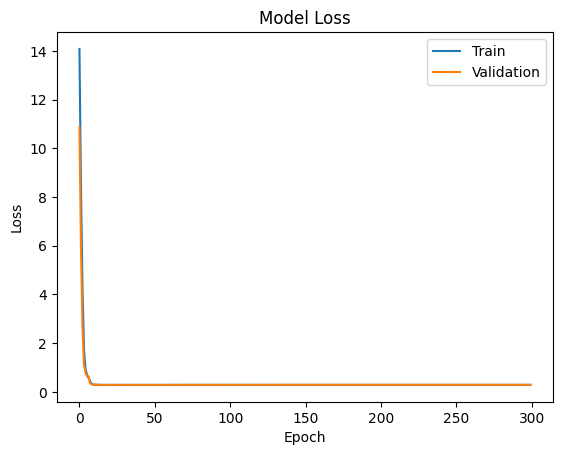

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [30]:
from sklearn.metrics import confusion_matrix
pred = model3.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

1/1 [==============================] - 0s 199ms/step


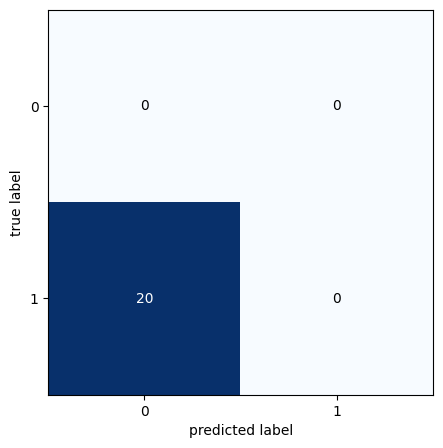

In [31]:
CM = confusion_matrix(pred,y_true)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

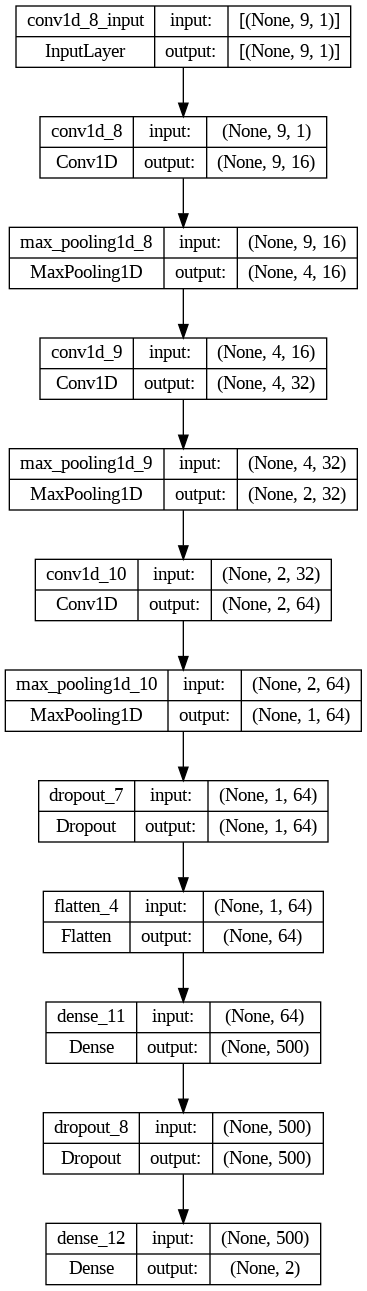

In [32]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from graphviz import Source
# Generate a diagram of the model architecture
plot_model(model3,show_shapes=True)



In [33]:
X_train.shape[0]

64

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)
y_pred = model.predict(X_test)

# convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# compute precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1-score: {f1_score:.3f}')

Epoch 1/100
2/2 [==============================] - 4s 868ms/step - loss: 56.1621 - accuracy: 0.4375 - val_loss: 73.6562 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 132ms/step - loss: 39.8865 - accuracy: 0.4375 - val_loss: 46.2180 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 109ms/step - loss: 23.8383 - accuracy: 0.4375 - val_loss: 18.8358 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 155ms/step - loss: 8.7940 - accuracy: 0.4844 - val_loss: 3.1377 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 0s 112ms/step - loss: 7.4290 - accuracy: 0.5156 - val_loss: 6.1331 - val_accuracy: 0.8750
Epoch 6/100
2/2 [==============================] - 0s 139ms/step - loss: 13.2129 - accuracy: 0.5625 - val_loss: 7.8891 - val_accuracy: 0.8750
Epoch 7/100
2/2 [==============================] - 0s 118ms/step - loss: 15.7120 - accuracy: 0.5625 - val_loss: 7.9728 - val_accuracy: 0.8750
Epoch

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)
y_pred = model.predict(X_test)

# convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# compute precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1-score: {f1_score:.3f}')

Epoch 1/100
2/2 [==============================] - 1s 206ms/step - loss: 124.2239 - accuracy: 0.4375 - val_loss: 187.2911 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 107.4730 - accuracy: 0.4375 - val_loss: 158.1002 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 89.7648 - accuracy: 0.4375 - val_loss: 129.5825 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 73.4039 - accuracy: 0.4375 - val_loss: 101.3762 - val_accuracy: 0.1250
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 56.0288 - accuracy: 0.4375 - val_loss: 73.7113 - val_accuracy: 0.1250
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 40.4807 - accuracy: 0.4375 - val_loss: 46.1096 - val_accuracy: 0.1250
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 23.3807 - accuracy: 0.4375 - val_loss: 18.9013 - val_accuracy: 0.1250

1.2799534797668457 0.4000000059604645
1/1 [==============================] - 0s 29ms/step - loss: 1.2800 - accuracy: 0.4000
Test loss: 1.280, test accuracy: 0.400, precision: 0.333, recall: 0.714, f1-score: 0.455


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define the early stopping criterion
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# fit the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)
y_pred = model.predict(X_test)

# convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# compute precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1-score: {f1_score:.3f}')


Epoch 1/100
2/2 [==============================] - 1s 206ms/step - loss: 47.8388 - accuracy: 0.5625 - val_loss: 58.4714 - val_accuracy: 0.3500
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 35.3700 - accuracy: 0.5625 - val_loss: 42.4368 - val_accuracy: 0.3500
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 25.4910 - accuracy: 0.5625 - val_loss: 26.3662 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 0s 50ms/step - loss: 14.4544 - accuracy: 0.5625 - val_loss: 10.4963 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 3.6052 - accuracy: 0.5469 - val_loss: 6.6841 - val_accuracy: 0.6500
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 7.8995 - accuracy: 0.4375 - val_loss: 12.1940 - val_accuracy: 0.6500
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 12.8657 - accuracy: 0.4375 - val_loss: 12.1536 - val_accuracy: 0.6500
Epoch 8/

1/1 [==============================] - 0s 111ms/step - loss: 1.2558 - accuracy: 0.5000
Test loss: 1.256, test accuracy: 0.500, precision: 0.286, recall: 0.286, f1-score: 0.286


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
y_pred = model.predict(X_test)

# Compute metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print out the results
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy:.3f}')
print(f'Test Precision: {precision:.3f}')
print(f'Test Recall: {recall:.3f}')
print(f'Test F1-Score: {f1_score:.3f}')


Epoch 1/300
2/2 [==============================] - 3s 483ms/step - loss: 70.0020 - accuracy: 0.5625 - val_loss: 17.6420 - val_accuracy: 0.8750
Epoch 2/300
2/2 [==============================] - 0s 96ms/step - loss: 62.2249 - accuracy: 0.5625 - val_loss: 15.8335 - val_accuracy: 0.8750
Epoch 3/300
2/2 [==============================] - 0s 71ms/step - loss: 61.4685 - accuracy: 0.5625 - val_loss: 14.0595 - val_accuracy: 0.8750
Epoch 4/300
2/2 [==============================] - 0s 79ms/step - loss: 72.1920 - accuracy: 0.5625 - val_loss: 12.0907 - val_accuracy: 0.8750
Epoch 5/300
2/2 [==============================] - 0s 151ms/step - loss: 66.6545 - accuracy: 0.5625 - val_loss: 10.2494 - val_accuracy: 0.8750
Epoch 6/300
2/2 [==============================] - 0s 84ms/step - loss: 46.2340 - accuracy: 0.5625 - val_loss: 8.0349 - val_accuracy: 0.8750
Epoch 7/300
2/2 [==============================] - 0s 76ms/step - loss: 53.0200 - accuracy: 0.5625 - val_loss: 5.7311 - val_accuracy: 0.8750
Epoch 

In [88]:
def build_model(optimizer):
  model=Sequential()
  model.add(Conv1D(32,kernel_size=2,activation='relu',input_shape=(9,1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='softmax'))
  model.compile(loss=keras.losses.binary_crossentropy, optimizer= optimizer, metrics=['accuracy'])
  return model

In [92]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for i in optimizers:
  model = build_model(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=300, verbose=1, validation_data=(X_val,y_val))
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1-score: {f1_score:.3f}')

Epoch 1/300
2/2 [==============================] - 1s 201ms/step - loss: 26.1457 - accuracy: 0.5625 - val_loss: 11.3830 - val_accuracy: 0.8750
Epoch 2/300
2/2 [==============================] - 0s 54ms/step - loss: 27.3400 - accuracy: 0.5625 - val_loss: 11.2894 - val_accuracy: 0.8750
Epoch 3/300
2/2 [==============================] - 0s 42ms/step - loss: 36.2392 - accuracy: 0.5625 - val_loss: 11.2081 - val_accuracy: 0.8750
Epoch 4/300
2/2 [==============================] - 0s 71ms/step - loss: 27.5609 - accuracy: 0.5625 - val_loss: 11.1844 - val_accuracy: 0.8750
Epoch 5/300
2/2 [==============================] - 0s 73ms/step - loss: 30.3673 - accuracy: 0.5625 - val_loss: 11.1146 - val_accuracy: 0.8750
Epoch 6/300
2/2 [==============================] - 0s 75ms/step - loss: 24.7211 - accuracy: 0.5625 - val_loss: 10.9861 - val_accuracy: 0.8750
Epoch 7/300
2/2 [==============================] - 0s 70ms/step - loss: 20.0436 - accuracy: 0.5625 - val_loss: 10.8927 - val_accuracy: 0.8750
Epoch

In [93]:
def build_model(optimizer):
  model = Sequential()
  model.add(Dropout(0.2))
  model.add(Dense(units=64, activation='relu', input_dim=input_layer))
  model.add(Dropout(0.2))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [94]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for i in optimizers:
  model = build_model(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=300, verbose=1, validation_data=(X_val,y_val))
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1-score: {f1_score:.3f}')

Epoch 1/300
2/2 [==============================] - 2s 275ms/step - loss: 90.3454 - accuracy: 0.4219 - val_loss: 50.2977 - val_accuracy: 0.1250
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 80.6622 - accuracy: 0.4531 - val_loss: 12.8909 - val_accuracy: 0.1250
Epoch 3/300
2/2 [==============================] - 0s 53ms/step - loss: 49.6418 - accuracy: 0.4531 - val_loss: 6.4627 - val_accuracy: 0.8750
Epoch 4/300
2/2 [==============================] - 0s 56ms/step - loss: 52.6417 - accuracy: 0.4219 - val_loss: 11.7169 - val_accuracy: 0.8750
Epoch 5/300
2/2 [==============================] - 0s 34ms/step - loss: 55.5062 - accuracy: 0.4062 - val_loss: 15.4675 - val_accuracy: 0.8750
Epoch 6/300
2/2 [==============================] - 0s 36ms/step - loss: 41.3765 - accuracy: 0.5625 - val_loss: 18.5075 - val_accuracy: 0.8750
Epoch 7/300
2/2 [==============================] - 0s 35ms/step - loss: 45.6682 - accuracy: 0.5156 - val_loss: 19.7147 - val_accuracy: 0.8750
Epoch 